In [1]:
'''
Woodchuck Project
This was the first Project competition 
The goal was to learn Pre-processing in ML
We were given a variety of woodchucks and we had to classify them
However the data had Gaussian noise and other quirky parts like conversion errors  

My team came in first with this code

'''

import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import matplotlib.pyplot as plt



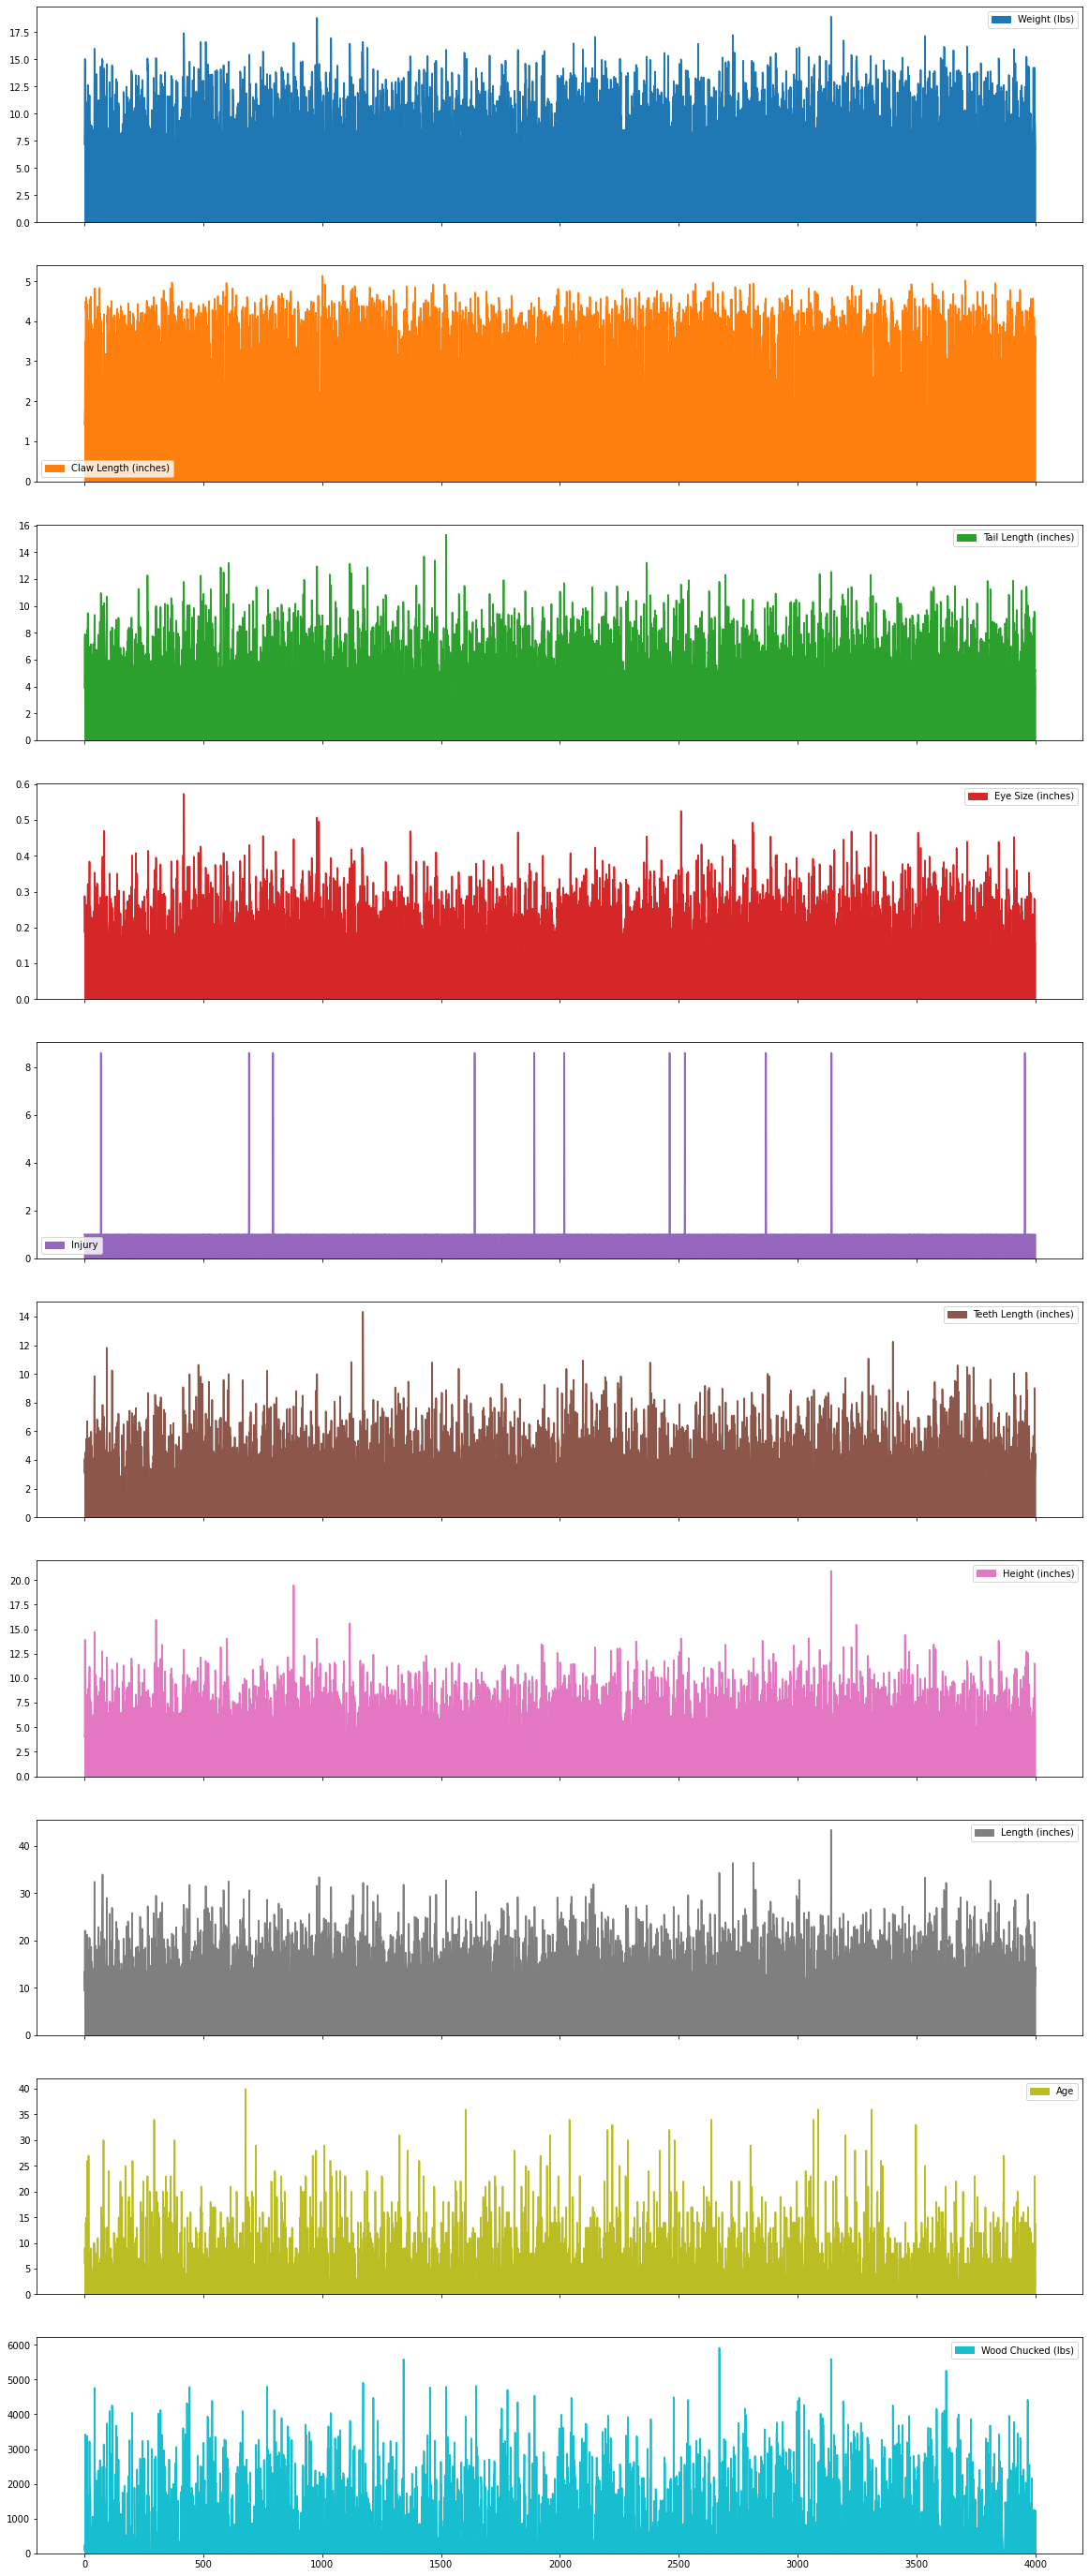

In [2]:


#TO TRY, CUT THE EXTREMES THEN REPLACE WITH AVG OR MEDIAN 
#EACH IS OFF BY AN THE SPECIFIC CONVERSION FACTOR 
#UNIT CONVRESION MISTAKES!

#use .mask instead of .replace

# OR SPLIT/DROP VALID DATA, CONVERT REMAINING(BAD DATA), THEN COMBINE BOTH
#120 TREES AUTO FOR MAX FEATURES
to_clean = {'Weight (lbs)': 100, 'Claw Length (inches)': 7, 'Tail Length (inches)': 50,'Eye Size (inches)': .6,
            'Teeth Length (inches)': 20, 'Height (inches)': 25, 'Length (inches)': 50,  'Age': 40}



data = pd.read_csv (r'woodchuck_class.csv')
data= pd.DataFrame(data)
data.describe()


data = data.drop("Sex",axis=1)
data = data.drop("Name",axis=1)
#data = data.drop("Claw Length (inches)",axis=1)
data = data.drop("Number of Siblings",axis=1)
#data = data.drop("Claw Length (inches)",axis=1

#data = data.drop("Sex",axis=1)
data = data.drop("Fur Color",axis=1) 

for i, val in enumerate(data['Weight (lbs)']):
    if val > 100:
        data['Weight (lbs)'].iloc[i] = val/454#convert grams to lbs
        
       # data['Weight (lbs)'].iloc[i] = val/165#found by avg
       # print(i, val, wood_data['Weight (lbs)'].iloc[i])


name =  'Claw Length (inches)'
for i, val in enumerate(data[name]):
    if val > 7:
        data[name].iloc[i] = val/25.4 #convert mm to in
       # print(i, val, wood_data[name].iloc[i])    
  
name =  'Tail Length (inches)'
for i, val in enumerate(data[name]):
    if val > 50:
       # print(val, val/25.4)
        data[name].iloc[i] = val/25.4 #convert mm to in
       # print(i, val, wood_data[name].iloc[i])
    
name =  'Eye Size (inches)'
for i, val in enumerate(data[name]):
    if val > .6:
       # print(val, val/25.4)
        data[name].iloc[i] = val/25.4 #convert cm to in
       # print(i, val, wood_data[name].iloc[i])

name =  'Teeth Length (inches)'
for i, val in enumerate(data[name]):
    if val > 20:
       # print(val, val/25.4)
        data[name].iloc[i] = val/25.4 #convert mm to in
       # print(i, val, wood_data[name].iloc[i])

    
name =  'Length (inches)'
for i, val in enumerate(data[name]):
    if val > 50:
        
        data[name].iloc[i] = val/25.4 #convert mm to in

name =  'Height (inches)'
for i, val in enumerate(data[name]):
    if val > 25:
       # print(val, val/25.4)
        data[name].iloc[i] = val/25.4 #convert mm to in

    
data = data.replace("yes",'0')
data =data.replace('no','1')
data["Injury"]=pd.to_numeric(data["Injury"])


for key in to_clean.keys():
    data.fillna(value=data[key].mean(), inplace=True)


corr_matrix= data.corr()
corr_matrix

data.plot.area(figsize=(20, 50), subplots=True)
plt.show() #the plot shows the distribution of features, we used this to spot outliers 

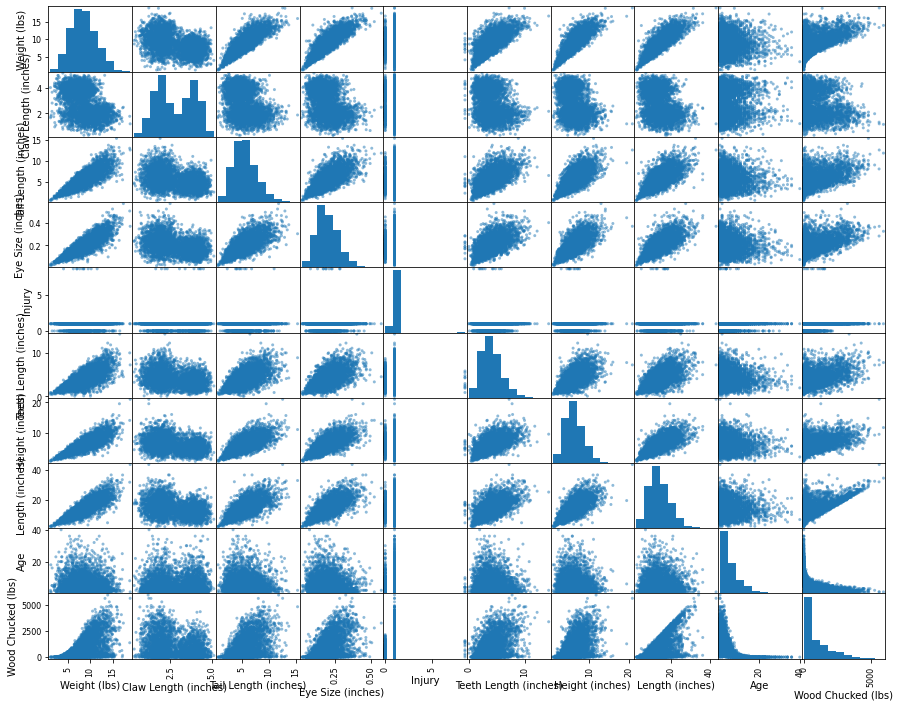

In [3]:
#rms is last block
from pandas.plotting import scatter_matrix
scatter_matrix(data, figsize=(15,12))
plt.show()

In [4]:

data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Weight (lbs)           4000 non-null   float64
 1   Claw Length (inches)   4000 non-null   float64
 2   Tail Length (inches)   4000 non-null   float64
 3   Eye Size (inches)      4000 non-null   float64
 4   Injury                 4000 non-null   float64
 5   Teeth Length (inches)  4000 non-null   float64
 6   Height (inches)        4000 non-null   float64
 7   Length (inches)        4000 non-null   float64
 8   Age                    4000 non-null   float64
 9   Wood Chucked (lbs)     4000 non-null   float64
dtypes: float64(10)
memory usage: 312.6 KB


In [5]:
from sklearn.model_selection import train_test_split
data
train_set, test_set = train_test_split(data,test_size=0.15,random_state=42)
train_values, train_features = train_set["Wood Chucked (lbs)"], train_set.drop("Wood Chucked (lbs)",axis=1)
test_values, test_features   = test_set["Wood Chucked (lbs)"],  test_set.drop("Wood Chucked (lbs)",axis=1)

In [6]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, interaction_only=False)
train_features = poly.fit_transform(train_features)
test_features = poly.fit_transform(test_features)

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
forest_reg = RandomForestRegressor(n_estimators=320,random_state=2, max_features =22) #this was our best result
forest_reg.fit(train_features,train_values)
train_predictions = forest_reg.predict(train_features)
test_predictions  = forest_reg.predict(test_features)

In [8]:
train_rmse        = pow(mean_squared_error(train_values,train_predictions),0.5)
test_rmse         = pow(mean_squared_error(test_values,test_predictions),0.5)
print("Training data RMSE: ", train_rmse)
print("Test data RMSE:", test_rmse)

Training data RMSE:  25.94181459390541
Test data RMSE: 72.03618151009414


In [9]:
from sklearn.model_selection import cross_val_score

In [10]:
scores = cross_val_score(forest_reg, train_features, train_values, scoring = 'neg_mean_squared_error',cv =2)#cv is the number of runs

scores = np.sqrt(-scores)
print("cross val score: ", scores)
print("mean: ", scores.mean())

cross val score:  [81.01984315 94.31504272]
mean:  87.66744293293627


In [11]:
test_data = pd.read_csv (r'woodchuck_test_features.csv')
#test_data = pd.read_csv (r'woodchuck_test.csv')
test_data= pd.DataFrame(test_data)

test_data = test_data.drop("Sex",axis=1)
test_data = test_data.drop("Name",axis=1)
#test_data = test_data.drop("Claw Length (inches)",axis=1)
test_data = test_data.drop("Number of Siblings",axis=1)
#test_data = test_data.drop("Claw Length (inches)",axis=1

#test_data = test_data.drop("Sex",axis=1)
test_data = test_data.drop("Fur Color",axis=1) 

for i, val in enumerate(test_data['Weight (lbs)']):
    if val > 100:
        test_data['Weight (lbs)'].iloc[i] = val/454#convert grams to lbs
       # print(i, val, wood_test_data['Weight (lbs)'].iloc[i])


name =  'Claw Length (inches)'
for i, val in enumerate(test_data[name]):
    if val > 7:
        test_data[name].iloc[i] = val/25.4 #convert mm to in
       # print(i, val, wood_test_data[name].iloc[i])    
  
name =  'Tail Length (inches)'
for i, val in enumerate(test_data[name]):
    if val > 50:
       # print(val, val/25.4)
        test_data[name].iloc[i] = val/25.4 #convert mm to in
       # print(i, val, wood_test_data[name].iloc[i])
    
name =  'Eye Size (inches)'
for i, val in enumerate(test_data[name]):
    if val > .6:
       # print(val, val/25.4)
        test_data[name].iloc[i] = val/25.4 #convert cm to in
       # print(i, val, wood_test_data[name].iloc[i])

name =  'Teeth Length (inches)'
for i, val in enumerate(test_data[name]):
    if val > 20:
       # print(val, val/25.4)
        test_data[name].iloc[i] = val/25.4 #convert mm to in
       # print(i, val, wood_test_data[name].iloc[i])

name =  'Length (inches)'
for i, val in enumerate(test_data[name]):
    if val > 50:# and val <200:
        
        test_data[name].iloc[i] = val/25.4 #convert mm to in
       # print(i, val, wood_test_data[name].iloc[i])
   # elif val >= 200:
    #    test_data[name].iloc[i] = val/25.4 #convert cm to in
       # print(i, val, wood_test_data[name].iloc[i])
 

name =  'Height (inches)'
for i, val in enumerate(test_data[name]):
    if val > 30:
       # print(val, val/25.4)
        test_data[name].iloc[i] = val/25.4 #convert mm to in
       # print(i, val, wood_test_data[name].iloc[i])

    
#test_data = test_data[test_data["Injury"]=="no"]
#test_data = test_data.drop("Injury",axis=1)    
test_data = test_data.replace("yes",'0')
test_data =test_data.replace('no','1')
test_data["Injury"]=pd.to_numeric(test_data["Injury"])


test_data.describe()
test_data.info()

#test_data = test_data.dropna()#cannot keep this
for key in to_clean.keys():
    print(key)
    test_data.fillna(value=test_data[key].median(), inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Weight (lbs)           4000 non-null   float64
 1   Claw Length (inches)   4000 non-null   float64
 2   Tail Length (inches)   4000 non-null   float64
 3   Eye Size (inches)      4000 non-null   float64
 4   Injury                 3986 non-null   float64
 5   Teeth Length (inches)  4000 non-null   float64
 6   Height (inches)        4000 non-null   float64
 7   Length (inches)        4000 non-null   float64
 8   Age                    4000 non-null   float64
dtypes: float64(9)
memory usage: 281.4 KB
Weight (lbs)
Claw Length (inches)
Tail Length (inches)
Eye Size (inches)
Teeth Length (inches)
Height (inches)
Length (inches)
Age


In [12]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, interaction_only=False)
#train_features = poly.fit_transform(train_features)
test_features_2 = poly.fit_transform(test_data)

#train_predictions = forest_reg.predict(train_features)
test_predictions_2  = forest_reg.predict(test_features_2)

#train_rmse        = pow(mean_squared_error(train_values,train_predictions),0.5)
test_rmse         = pow(mean_squared_error(data["Wood Chucked (lbs)"],test_predictions_2),0.5)
#print("Training data RMSE: ", train_rmse)
print("Test data RMSE:", test_rmse)

test_predictions_2 = pd.DataFrame(test_predictions_2, columns = ['Woodchucked predictions'])
test_predictions_2.to_csv('out_predictions.csv', index = False) #pandas out to csv
#this RMSE was high becuase the test data is differnet than our train data
#However, my team had the lowest score, thus giving us first place

Test data RMSE: 1411.481124730605
